#### 무게를 찾기
- 목표: 농어(Perch)길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋: fish.csv
- 피쳐/속성:Length
- 타겟/라벨: weight
- 학습-방법: 지도학습-> 회귀
- 알고리즘: 선형회귀 (데이터의 분포가 선형의 형태)

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [248]:
fishDF= pd.read_csv('../data/fish.csv')
fishDF.head()
search= fishDF['Species']=='Perch'
fishDF= fishDF[search]

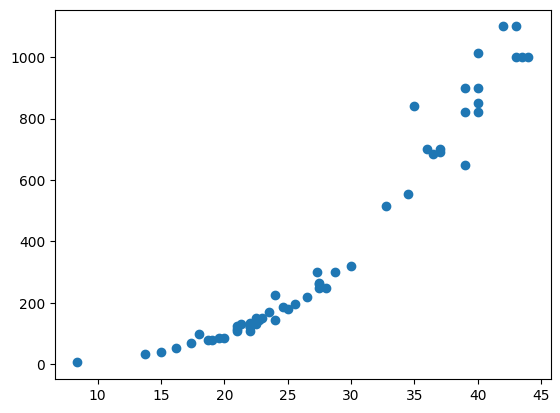

In [249]:
plt.scatter(fishDF['Length'],fishDF['Weight'])

In [272]:


feature= fishDF['Length']
target= fishDF['Weight']

In [251]:
# 데이터셋 분리
X_train, X_test, Y_train, Y_test= train_test_split(feature, target, test_size=0.2)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


((44,), (44,), (12,), (12,))

In [252]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
Y_train.reset_index(drop=True,inplace=True)
Y_test.reset_index(drop=True,inplace=True)

X_train= X_train.to_frame()

X_test= X_test.to_frame()

In [253]:
# 스케일링
scale= MinMaxScaler()
scale.fit(X_train)

MinMaxScaler()

In [254]:
X_train_S=scale.transform(X_train)
X_test_S=scale.transform(X_test)



In [274]:
# 학습 및 테스트
model= LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [275]:
model.score(X_test, Y_test)

0.918851437094111

In [278]:
a= model.coef_ 
b= model.intercept_
a, b

(array([35.94125584]), -620.7227560608085)

In [260]:
fishDF.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [291]:
import numpy as np
x= np.linspace(18,45, 100)
y= a*x+b

array([-0.05790227])

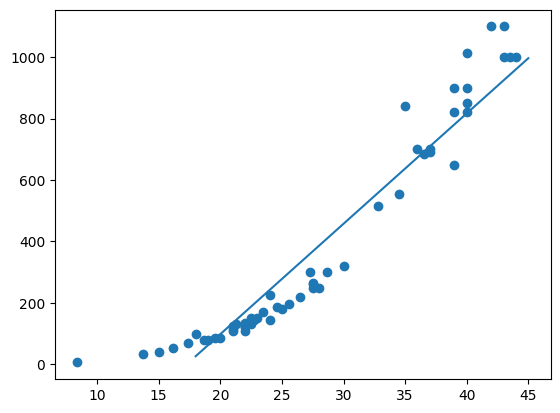

In [290]:
plt.scatter(fishDF['Length'],fishDF['Weight'])
plt.plot(x, y)
plt.show()